In [1]:
# reading data

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# drop unnecessary columns and rename cols

data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# check missing values and shape

print(f"Check if there are some missing data:\n{data.isna().sum()}\n\nCheck data shape: {data.shape}")


Check if there are some missing data:
label    0
text     0
dtype: int64

Check data shape: (5572, 2)


<Axes: xlabel='label'>

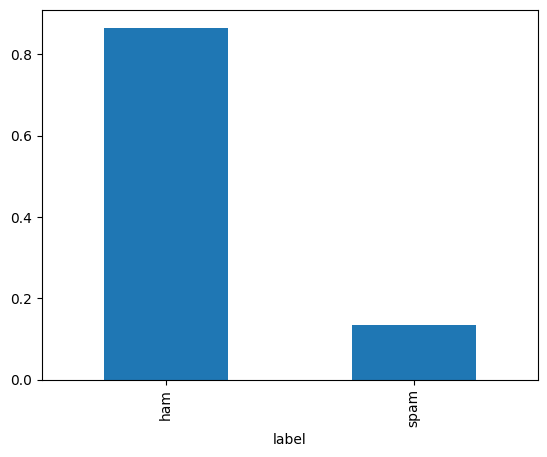

In [4]:
# check target balance

data['label'].value_counts(normalize=True).plot.bar()

### Text Preprocessing

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

text = list(data['text'])

lemmatizer = WordNetLemmatizer()

corpus = []

print(f"Starting.....")
for i in range(len(text)):
    print(f"Line N. {i}")
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    print(f"Output: {r}")

    corpus.append(r)

# assign corpus to data['text]

data['text'] = corpus

data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pasqu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pasqu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Starting.....
Line N. 0
Output: go jurong point crazy available bugis n great world la e buffet cine got amore wat
Line N. 1
Output: ok lar joking wif u oni
Line N. 2
Output: free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
Line N. 3
Output: u dun say early hor u c already say
Line N. 4
Output: nah think go usf life around though
Line N. 5
Output: freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
Line N. 6
Output: even brother like speak treat like aid patent
Line N. 7
Output: per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune
Line N. 8
Output: winner valued network customer selected receivea prize reward claim call claim code kl valid hour
Line N. 9
Output: mobile month u r entitled update latest colour mobile camera free call mobile update co free
Line N. 10
Output: gonna home soon want talk stuff anymore tonight k cried enough today
Line N. 11
O

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [6]:
# create feature and label sets

X = data['text']
y = data['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=123)

print(f'Training Data: {X_train.shape}')
print(f'Testing Data: {X_test.shape}')

Training Data: (3733,)
Testing Data: (1839,)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(3733, 5698)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

X_test_cv = cv.transform(X_test)

predictions = lr.predict(X_test_cv)
predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [11]:
# confusion matrix
from sklearn import metrics

#df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

metrics.confusion_matrix(y_test,predictions)

array([[1600,    2],
       [  31,  206]], dtype=int64)